###### 
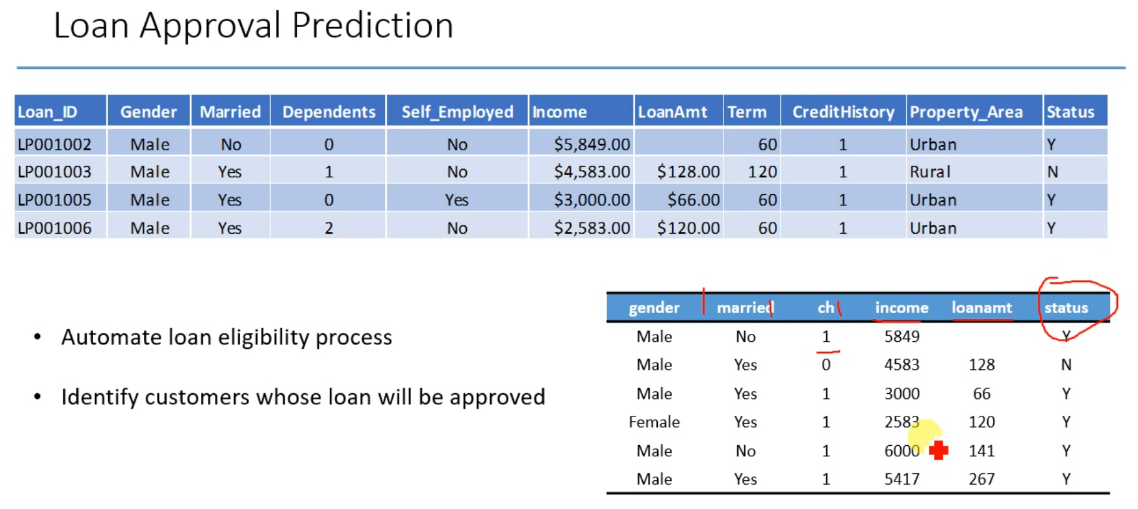

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
LoanData = pd.read_csv("01Exercise1.csv")
LoanPrep = LoanData.copy()
LoanPrep.head()

,gender,married,ch,income,loanamt,status
0,Male,No,1.0,5849,NaN,Y
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y


In [15]:
# Check missing value
LoanPrep.isnull().sum()
#Drop missing value
LoanPrep = LoanPrep.dropna()
LoanPrep.head()

,gender,married,ch,income,loanamt,status
1,Male,Yes,1.0,4583,128.0,N
2,Male,Yes,1.0,3000,66.0,Y
3,Male,Yes,1.0,2583,120.0,Y
4,Male,No,1.0,6000,141.0,Y
5,Male,Yes,1.0,5417,267.0,Y


In [16]:
# Gender có vẻ như sẽ k phải yếu tố mà các ngân hàng sẽ xem xét khi cho vay --> Loại (Cảm tính)
# Married thể hiện sự ổn định tài chính --> Giữ
# Ch (credit history) --> Giữ
LoanPrep = LoanPrep.drop(['gender'], axis = 1)


In [17]:
# Create dummy
LoanPrep.dtypes
LoanPrep.married = LoanPrep.married.astype('category')
LoanPrep.ch = LoanPrep.ch.astype('category')
LoanPrep.status = LoanPrep.status.astype('category')

LoanPrep = pd.get_dummies(LoanPrep, drop_first=True)
LoanPrep.head()

,income,loanamt,married_Yes,ch_1.0,status_Y
1,4583,128.0,1,1,0
2,3000,66.0,1,1,1
3,2583,120.0,1,1,1
4,6000,141.0,0,1,1
5,5417,267.0,1,1,1


In [18]:
# Normalize data cho LoanAmt và income
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()
LoanPrep.income = scalar_.fit_transform(LoanPrep[['income']])
LoanPrep.loanamt = scalar_.fit_transform(LoanPrep[['loanamt']])

In [19]:
# Train test split
from sklearn.model_selection import train_test_split
Y = LoanPrep.status_Y
X = LoanPrep.drop(['status_Y'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1234, stratify = Y) 
#stratify dùng để chia tỷ lệ nhãn giống với data gốc
print(Y.value_counts(normalize=True))
print(y_train.value_counts(normalize = True))

1    0.689981
0    0.310019
Name: status_Y, dtype: float64
1    0.689189
0    0.310811
Name: status_Y, dtype: float64


In [20]:
# Fit model and predict
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_preditct = lr.predict(x_test)

#### Compare result using confuse matrix
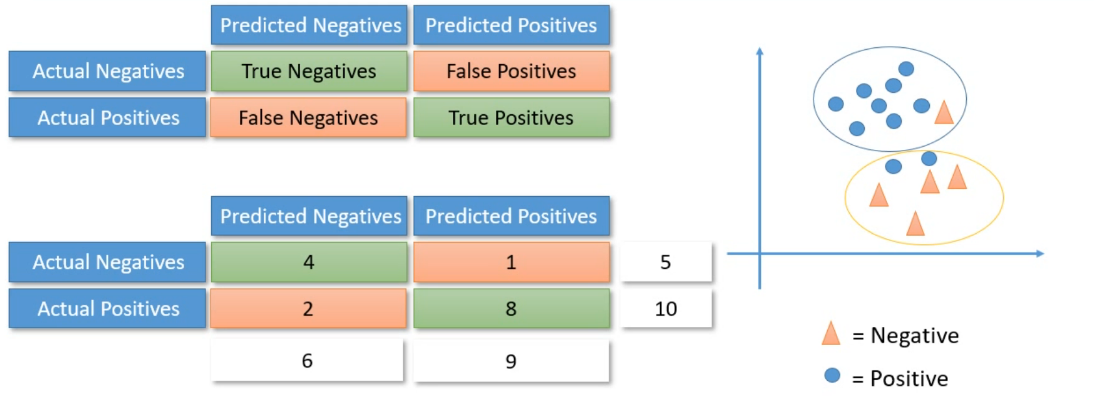

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preditct)
cm

array([[ 29,  20],
       [  2, 108]], dtype=int64)

In [22]:
lr.score(x_test,y_test) # 86% precent accurate in predicting

0.8616352201257862

In [23]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_preditct)
print(cr)

#support: Bao nhiêu actual value tại mỗi class

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        49
           1       0.84      0.98      0.91       110

    accuracy                           0.86       159
   macro avg       0.89      0.79      0.82       159
weighted avg       0.87      0.86      0.85       159



# AUC - ROC

In [36]:
#Tính xác suất của X_test cho True. Lấy cột 1 vì khi get dummy ta drop column first --> như này để so sánh với Y_Test
y_prob = lr.predict_proba(x_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test,y_prob)
print(fpr, tpr, threshold)

[0.         0.         0.         0.02040816 0.02040816 0.04081633
 0.04081633 0.06122449 0.06122449 0.08163265 0.08163265 0.10204082
 0.10204082 0.12244898 0.12244898 0.14285714 0.14285714 0.18367347
 0.18367347 0.24489796 0.24489796 0.28571429 0.28571429 0.30612245
 0.30612245 0.32653061 0.32653061 0.3877551  0.3877551  0.40816327
 0.40816327 0.63265306 0.63265306 1.         1.        ] [0.         0.00909091 0.08181818 0.08181818 0.36363636 0.36363636
 0.4        0.4        0.53636364 0.53636364 0.56363636 0.56363636
 0.62727273 0.62727273 0.65454545 0.65454545 0.72727273 0.72727273
 0.74545455 0.74545455 0.82727273 0.82727273 0.87272727 0.87272727
 0.90909091 0.90909091 0.91818182 0.91818182 0.96363636 0.96363636
 0.98181818 0.98181818 0.99090909 0.99090909 1.        ] [1.83648173 0.83648173 0.82303971 0.82288197 0.80502898 0.80372215
 0.80245701 0.80229149 0.78837469 0.7881667  0.7860087  0.78512469
 0.77875349 0.77871207 0.77446178 0.77401147 0.76568453 0.76368982
 0.76152551 0.7

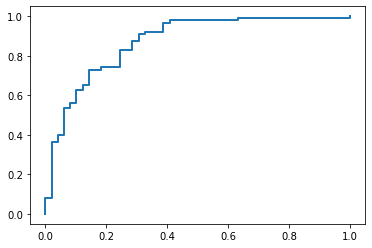

In [38]:
AUC = roc_auc_score(y_test,y_prob)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, linewidth = 2)